# Workflow for spheroid classification from brightfield microscopy images

## <span style="color:red"> INPUT - Select single image </span>

```path_to_images``` is the path of the image **RELATIVE** to the location of the current notebook

In [1]:
# Example
imagefile = "stella/input/STELLA_sA400_semiauto_Merge_500-20_B04_D7.hdf5"

## Run analysis flags

In [2]:
run_ilastik = True
run_imagej_ilastik = True
run_cellpro = True
run_imagej_cellpro = True

## Preamble

### Software locations

In [3]:
ilastik_software = '/ilastik/ilastik-1.3.3post3-Linux/run_ilastik.sh'

imagej_software = '/imagej/Fiji.app/ImageJ-linux64'

cellprofiler_software = '/opt/conda/envs/cprofiler/bin/cellprofiler'

## Load libraries

In [4]:
import imageio
import cv2
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path
from subprocess import Popen, PIPE
import os
plt.rcParams["figure.figsize"] = (10,10)

## Load imagefile

In [5]:
# Define ouput folder
image_path = Path(imagefile).resolve()
folder_path = image_path.parent.parent / 'output/images'
results_folder = folder_path / image_path.stem

### Projects

There are separate Ilastik classifiers for the manual and the automated images

In [6]:
ilastik_project = 'stella/20220525_stella_manual_pixelclassification.ilp'
grid_ilastik_project = 'stella/20220525_stella_manual_GridDetection_pixelclassification.ilp'

## Ilastik - pixel classification

### Probability

In [7]:
# the following line of code tells ilastik to create 
# a folder with the same name of the image where 
# results in .h5 format will be stored
output_format = folder_path / '{nickname}/ilastik/probabilities/{nickname}_{result_type}.h5'

In [8]:
ilastik_project_path = str(Path(ilastik_project).resolve())

ilastikexpsource = 'probabilities'

options = ['--headless',
           '--project=' + ilastik_project_path,
           '--export_source=' + ilastikexpsource,
           '--output_filename_format=' + str(output_format),
           str(image_path)
          ]

command = [ilastik_software] + options
' '.join(command)

'/ilastik/ilastik-1.3.3post3-Linux/run_ilastik.sh --headless --project=/home/host_home/figures/automated_image_analysis/semi_automated/stella/20220525_stella_manual_pixelclassification.ilp --export_source=probabilities --output_filename_format=/home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/{nickname}/ilastik/probabilities/{nickname}_{result_type}.h5 /home/host_home/figures/automated_image_analysis/semi_automated/stella/input/STELLA_sA800_semiauto_Merge_500-20_B01_D21.hdf5'

In [9]:
if run_ilastik:
    subprocess.call(command)

/ilastik/ilastik-1.3.3post3-Linux/ilastik-meta/lazyflow/lazyflow/classifiers/__init__.py:20: UserWarning: init: Could not import tiktorch classifier
  warnings.warn("init: Could not import tiktorch classifier")


INFO ilastik_main: Starting ilastik from "/ilastik/ilastik-1.3.3post3-Linux".


WARNING 2022-08-23 10:11:05,912 opConservationTracking 787 140414024476480 Could not find any ILP solver
WARNING 2022-08-23 10:11:05,924 opStructuredTracking 787 140414024476480 Could not find any ILP solver
WARNING 2022-08-23 10:11:05,925 structuredTrackingWorkflow 787 140414024476480 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


Starting ilastik from "/ilastik/ilastik-1.3.3post3-Linux".
INFO ilastik.shell.projectManager: Opening Project: /home/host_home/figures/automated_image_analysis/semi_automated/stella/20220525_stella_manual_pixelclassification.ilp


WARNING dataset.py(313): H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
WARNING opSimpleBlockedArrayCache.py(43): FutureWarning: Conversion of the second argument of issubdtype from `dtype` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(dtype).type`.
WARNING opSlicedBlockedArrayCache.py(141): FutureWarning: Conversion of the second argument of issubdtype from `dtype` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(dtype).type`.


INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/STELLA_sA800_semiauto_Merge_500-20_B01_D21/ilastik/probabilities/STELLA_sA800_semiauto_Merge_500-20_B01_D21_Probabilities.h5/exported_data
INFO lazyflow.operators.ioOperators.ioOperators.OpH5N5WriterBigDataset: Data shape: (1200, 1600, 2)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 652.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 4.8GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (704, 704, 2)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 616.3MiB
DEBUG lazyflow.operators.classifierOperators: Features took 3.205432 seconds. Prediction took 1.165338 seconds. Subregi

## Imagej conversion of .h5 files to .tif

### Probability .h5 conversion to .tif

In [10]:
imagej_macro = 'imagej/macros/macro_ilastik/ilastik_prob2tif.ijm'
imagej_macro_path = str(Path(imagej_macro).resolve())

h5_folder = results_folder / 'ilastik/probabilities' / image_path.stem
h5_file = str(h5_folder) + '_Probabilities.h5'
h5_file

options = ['--headless',
           '--console',
           '-macro "' + imagej_macro_path + '"',
           '"' + h5_file + '"'
          ]

command = [imagej_software] + options
command = ' '.join(command)
command

'/imagej/Fiji.app/ImageJ-linux64 --headless --console -macro "/home/host_home/figures/automated_image_analysis/semi_automated/imagej/macros/macro_ilastik/ilastik_prob2tif.ijm" "/home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/STELLA_sA800_semiauto_Merge_500-20_B01_D21/ilastik/probabilities/STELLA_sA800_semiauto_Merge_500-20_B01_D21_Probabilities.h5"'

In [11]:
if run_imagej_ilastik:
    process = Popen(command, shell=True, stdout=PIPE)
    # Poll process.stdout to show stdout live
    while True:
      output = process.stdout.readline()
      if process.poll() is not None:
        break
      if output:
        print(output.strip().decode('utf-8'))

OpenJDK 64-Bit Server VM warning: ignoring option PermSize=128m; support was removed in 8.0
OpenJDK 64-Bit Server VM warning: Using incremental CMS is deprecated and will likely be removed in a future release
Aug 23, 2022 10:11:17 AM java.util.prefs.FileSystemPreferences$1 run
INFO: Created user preferences directory.


[INFO] Trying to open: /home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/STELLA_sA800_semiauto_Merge_500-20_B01_D21/ilastik/probabilities/STELLA_sA800_semiauto_Merge_500-20_B01_D21_Probabilities.h5
[INFO] Detected internal path /exported_data
[INFO] Found dataset '/exported_data' of type 'float32'
[INFO] Constructing output image of shape (1600, 1200, 1, 2, 1). Axis order: 'XYCZT'
[INFO] Loading HDF5 dataset took: 1007ms
######

Saving STELLA_sA800_semiauto_Merge_500-20_B01_D21_Probabilities_ch1.tif

######

######

Saving STELLA_sA800_semiauto_Merge_500-20_B01_D21_Probabilities_ch2.tif

######



## Cell Profiler

### Input preparation

Create a ```load_input.csv``` file that inputs:

- image files to process
- ilastik probability .tif output for background (default: ```'{imagename}/ilastik/probabilities/{imagename}__Probabilities Stage 2_ch1.tif'```)
- ilastik probability .tif output for spheroids (default: ```'{imagename}/ilastik/probabilities/{imagename}__Probabilities Stage 2_ch2.tif'```)

In [12]:
probabilitiestif = results_folder / 'ilastik/probabilities' / Path(image_path.stem + '_Probabilities_ch2.tif')
original_image_path = image_path.parents[0] / 'original' / str(image_path.name[:-5]+'.tif')

d = {'Group_Number': [1],
     'Group_Index': [1],
     'URL_probabilities': [probabilitiestif.as_uri()],
     'URL_original': [original_image_path.as_uri()],
     'PathName_probabilities': [str(probabilitiestif.parents[0])],
     'PathName_original': [str(original_image_path.parents[0])],
     'FileName_probabilities': [probabilitiestif.name],
     'FileName_original': [original_image_path.name],
     'Series_probabilities': [0],
     'Series_original': [0],
     'Frame_probabilities': [0],
     'Frame_original': [0],
     'Channel_probabilities': [-1],
     'Channel_original': [-1],
     # 'Metadata_ChannelNumber': ['nan']
     # 'Metadata_FileLocation': ['nan'],
     'Metadata_Frame': [0],
     # 'Metadata_Plate':['nan'],
     # 'Metadata_Series':[0],
     # 'Metadata_Site':['nan'],
     # 'Metadata_Well':['nan']
    }

df = DataFrame(d)

df

,Group_Number,Group_Index,URL_probabilities,URL_original,PathName_probabilities,PathName_original,FileName_probabilities,FileName_original,Series_probabilities,Series_original,Frame_probabilities,Frame_original,Channel_probabilities,Channel_original,Metadata_Frame
0,1,1,file:///home/host_home/figures/automated_image...,file:///home/host_home/figures/automated_image...,/home/host_home/figures/automated_image_analys...,/home/host_home/figures/automated_image_analys...,STELLA_sA800_semiauto_Merge_500-20_B01_D21_Pro...,STELLA_sA800_semiauto_Merge_500-20_B01_D21.tif,0,0,0,0,-1,-1,0


Write ```load_input.csv``` file

In [13]:
loadinput_file = results_folder / Path('cellprofiler/load_input.csv')

loadinput_file.parent.mkdir(parents=True, exist_ok=True)

df.to_csv(str(loadinput_file), index=False)

### Run Cell Profiler analysis for spheroid segmentation

In [14]:
if "A800" in imagefile:
    cellpro_pipeline = 'stella/20220315_cp_stella_filters_manual_A800.cpproj'
    print("It is an image from an Aggrewell800")
else:
    if "A400" in imagefile:
        cellpro_pipeline = 'stella/20220315_cp_stella_filters_manual_A400.cpproj'
        print("It is an image from an Aggrewell400")
    else: 
        print("Image path must contain A800 or A400")

It is an image from an Aggrewell800


In [15]:
cellpro_pipeline_path = str(Path(cellpro_pipeline).resolve())
cellpro_folder = results_folder / 'cellprofiler'
cellpro_folder_path = str(Path(cellpro_folder).resolve())

options = ['-c',
           '-p "' + cellpro_pipeline_path + '"',
           '-o "' + cellpro_folder_path + '"',
           '--data-file "' + str(loadinput_file) + '"'
          ]

command = [cellprofiler_software] + options
command = ' '.join(command)
command

'/opt/conda/envs/cprofiler/bin/cellprofiler -c -p "/home/host_home/figures/automated_image_analysis/semi_automated/stella/20220315_cp_stella_filters_manual_A800.cpproj" -o "/home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/STELLA_sA800_semiauto_Merge_500-20_B01_D21/cellprofiler" --data-file "/home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/STELLA_sA800_semiauto_Merge_500-20_B01_D21/cellprofiler/load_input.csv"'

In [16]:
if run_cellpro:
    process = Popen(command, shell=True, stdout=PIPE)
    # Poll process.stdout to show stdout live
    while True:
      output = process.stdout.readline()
      if process.poll() is not None:
        break
      if output:
        print(output.strip().decode('utf-8'))

Times reported are CPU and Wall-clock times for each module
Tue Aug 23 10:11:26 2022: Image # 1, module LoadData # 1: CPU_time = 1.68 secs, Wall_time = 0.90 secs
Tue Aug 23 10:11:27 2022: Image # 1, module RescaleIntensity # 2: CPU_time = 0.60 secs, Wall_time = 0.55 secs
Tue Aug 23 10:11:28 2022: Image # 1, module ColorToGray # 3: CPU_time = 0.06 secs, Wall_time = 0.06 secs
Tue Aug 23 10:11:28 2022: Image # 1, module IdentifyPrimaryObjects # 4: CPU_time = 1.05 secs, Wall_time = 1.05 secs
Tue Aug 23 10:11:29 2022: Image # 1, module MeasureObjectSizeShape # 5: CPU_time = 0.28 secs, Wall_time = 0.28 secs
Tue Aug 23 10:11:29 2022: Image # 1, module FilterObjects # 6: CPU_time = 0.22 secs, Wall_time = 0.22 secs
Tue Aug 23 10:11:29 2022: Image # 1, module MeasureObjectSizeShape # 7: CPU_time = 0.25 secs, Wall_time = 0.25 secs
Tue Aug 23 10:11:30 2022: Image # 1, module MeasureTexture # 8: CPU_time = 24.19 secs, Wall_time = 1.54 secs
Tue Aug 23 10:11:31 2022: Image # 1, module MeasureObjectIn

# Workflow for grid detection from brightfield microscopy images

## Ilastik - pixel classification

### Simple segmentation

Ilastik outputs a binary tif file. 

In [17]:
# the following line of code tells ilastik to create 
# a folder with the same name of the image where 
# results in .h5 format will be stored
output_format = folder_path / '{nickname}/ilastik/probabilities/{nickname}_{result_type}.tif'

In [18]:
ilastik_project_path = str(Path(grid_ilastik_project).resolve())

# ilastikexpsource = 'probabilities'
ilastikexpsource = 'simple segmentation'

options = ['--headless',
           '--project=' + ilastik_project_path,
           '--export_source=' + ilastikexpsource,
           '--output_filename_format=' + str(output_format),
           str(image_path)
          ]

command = [ilastik_software] + options
' '.join(command)

'/ilastik/ilastik-1.3.3post3-Linux/run_ilastik.sh --headless --project=/home/host_home/figures/automated_image_analysis/semi_automated/stella/20220525_stella_manual_GridDetection_pixelclassification.ilp --export_source=simple segmentation --output_filename_format=/home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/{nickname}/ilastik/probabilities/{nickname}_{result_type}.tif /home/host_home/figures/automated_image_analysis/semi_automated/stella/input/STELLA_sA800_semiauto_Merge_500-20_B01_D21.hdf5'

In [19]:
if run_ilastik:
    subprocess.call(command)

/ilastik/ilastik-1.3.3post3-Linux/ilastik-meta/lazyflow/lazyflow/classifiers/__init__.py:20: UserWarning: init: Could not import tiktorch classifier
  warnings.warn("init: Could not import tiktorch classifier")


INFO ilastik_main: Starting ilastik from "/ilastik/ilastik-1.3.3post3-Linux".


WARNING 2022-08-23 10:11:35,439 opConservationTracking 927 140324443477824 Could not find any ILP solver
WARNING 2022-08-23 10:11:35,446 opStructuredTracking 927 140324443477824 Could not find any ILP solver
WARNING 2022-08-23 10:11:35,447 structuredTrackingWorkflow 927 140324443477824 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!


Starting ilastik from "/ilastik/ilastik-1.3.3post3-Linux".
INFO ilastik.shell.projectManager: Opening Project: /home/host_home/figures/automated_image_analysis/semi_automated/stella/20220525_stella_manual_GridDetection_pixelclassification.ilp


WARNING dataset.py(313): H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
WARNING opSimpleBlockedArrayCache.py(43): FutureWarning: Conversion of the second argument of issubdtype from `dtype` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(dtype).type`.
WARNING opSlicedBlockedArrayCache.py(141): FutureWarning: Conversion of the second argument of issubdtype from `dtype` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(dtype).type`.


INFO ilastik.workflows.pixelClassification.pixelClassificationWorkflow: Beginning Batch Processing
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to /home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/STELLA_sA800_semiauto_Merge_500-20_B01_D21/ilastik/probabilities/STELLA_sA800_semiauto_Merge_500-20_B01_D21_Simple Segmentation.tif
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 652.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 4.8GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (704, 704, 2)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 616.3MiB
DEBUG lazyflow.operators.classifierOperators: Features took 2.3136010000000002 seconds. Prediction took 1.610083 seconds. Subregion: start '[0, 0, 0]' stop '[704, 704, 2]'
DEBUG lazyflow.operators.classifierOperators: Features

## Python grid detection and well identification

### Select grid image

In [20]:
grid_image_folder = results_folder/'ilastik'/'probabilities'
grid_image_name = image_path.stem + '_Simple Segmentation.tif'
grid_image_file = grid_image_folder/grid_image_name
grid_filepath = str(grid_image_file)

In [21]:
if "A400" in grid_filepath:
    platform = "A400"
    print("It is an aggrewell400 image.")
else:
    if "A800" in grid_filepath:
        platform = "A800"
        print("It is an aggrewell800 image.")
    else:
        print("Define the platform by specifying 'A400' or 'A800' in the filename.")

It is an aggrewell800 image.


In [22]:
im = imageio.imread(grid_filepath) - 1
im.shape

(1200, 1600)

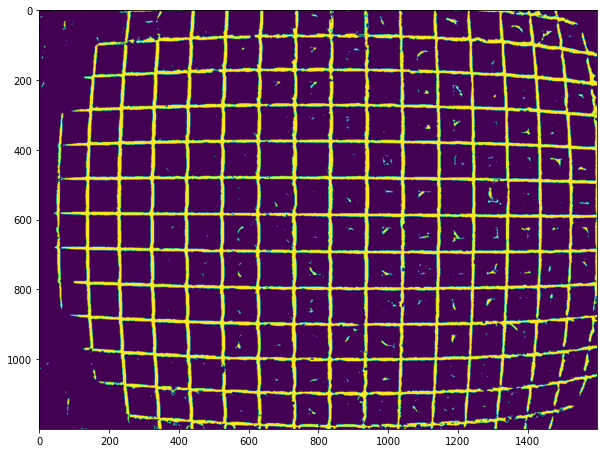

In [23]:
plt.imshow(im)

### Dilate image to connect all grids

[link](https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/)

In [24]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)

In [25]:
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_dilation = cv2.dilate(im, kernel, iterations=2)
img_dilation.shape

(1200, 1600)

### Extract the largest connected component in the image

[link](https://stackoverflow.com/questions/47055771/how-to-extract-the-largest-connected-component-using-opencv-and-python)

In [26]:
# connectedComponentsWithStats expects a uint8 image as imput. 
img_dilation = np.uint8(img_dilation)

In [27]:
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img_dilation, connectivity=8)

In [28]:
sizes = stats[:, -1]

In [29]:
max_label = 1
max_size = sizes[1]
for i in range(2, nb_components):
    if sizes[i] > max_size:
        max_label = i
        max_size = sizes[i]

In [30]:
img_largest_component = np.zeros(output.shape).astype(np.uint8)
img_largest_component[output == max_label] = 1

### Contour detection in openCV
[link](https://www.thepythoncode.com/article/contour-detection-opencv-python)

In [31]:
# find the contours from the skeletonized image
contours, hierarchy = cv2.findContours(img_largest_component, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

In [32]:
len(contours)

169

### Get contour points for all contours

As an A400 has a theoretical maximum of 1200 µwells, an A800 has a maximum of 300 µwells, and their dimensions are known, we can filter some of the false contours that are too small or not in the correct shape. 

In [33]:
# Initialize array
# columns: "contour_nr", "perimeter", "wellwidth","to_filter"
# "X1","Y1","X2","Y2","X3","Y3","X4","Y4"
nparr = np.empty([len(contours)+1,12])
nparr[:] = np.NaN
print(nparr)
nparr.shape
# contour_well_width = list(range(0,len(contours[0:20])))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(170, 12)

In [34]:
for i in list(range(0,len(contours))):
    id_cont = i
    # Contour approximation to 4 points
    epsilon = 0.1*cv2.arcLength(contours[id_cont],True)
    approx = cv2.approxPolyDP(contours[id_cont],epsilon,True)
    approx = approx.reshape((-1, 2))
    perimeter_approx = cv2.arcLength(approx,True)
    positions = np.concatenate(approx)
    
    # First filter: select only the contours with 4 corners.
    if len(positions) == 8:
        nparr[i,0] = i # contour number
        nparr[i,1] = perimeter_approx # approximated perimeter
        nparr[i,2] = perimeter_approx/4 # approximated well width
        nparr[i,4:12] = positions
        # Second filter based on known well width (+-130 for A400 and +-260 for A800)
        if platform == "A400" and nparr[i,2] > 30 and nparr[i,2] < 60:
            nparr[i,3] = 1
        else:
            if platform == "A800" and nparr[i,2] > 60 and nparr[i,2] < 90 :
                nparr[i,3] = 1
            else:
                nparr[i,3] = 0 

In [35]:
filtered = nparr[:,3] == 1
filtered_contours = nparr[filtered]
print('Amount of microwells detected: ' + str(len(filtered_contours)))
print('Average microwell size (pxl): ' + str(np.average(filtered_contours[:,2])))

Amount of microwells detected: 161
Average microwell size (pxl): 79.79094015441326


The inner microwell size of an A400 is 40 pxl. 

The inner microwell size of an A800 is 80 pxl.

In [36]:
# plt.hist(filtered_contours[:,2],bins=10)

### Draw detected contours

In [37]:
# plt.scatter(x=filtered_contours[:,4], y=filtered_contours[:,5])
# plt.scatter(x=filtered_contours[:,6], y=filtered_contours[:,7])
# plt.scatter(x=filtered_contours[:,8], y=filtered_contours[:,9])
# plt.scatter(x=filtered_contours[:,10], y=filtered_contours[:,11])
# plt.show()

# Save the results as a .csv dataframe with Pandas

In [38]:
results_csv = image_path.stem + '_grid.csv'

In [39]:
# columns: "contour_nr", "perimeter", "wellwidth","to_filter"
# "X1","Y1","X2","Y2","X3","Y3","X4","Y4"

df = DataFrame({"nr" : filtered_contours[:,0],
                   "perimeter" : filtered_contours[:,1], 
                   "wellwidth" : filtered_contours[:,2],
                   "X1" : filtered_contours[:,4],
                   "Y1" : filtered_contours[:,5],
                   "X2" : filtered_contours[:,6],
                   "Y2" : filtered_contours[:,7],
                   "X3" : filtered_contours[:,8],
                   "Y3" : filtered_contours[:,9],
                   "X4" : filtered_contours[:,10],
                   "Y4" : filtered_contours[:,11]})
df.to_csv(results_folder/results_csv)

# Run R script for image analysis

In [40]:
results_folder

PosixPath('/home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/STELLA_sA800_semiauto_Merge_500-20_B01_D21')

In [41]:
notebookname = 'R_image_analysis_Manual.ipynb'

In [42]:
print('\n\n---------- Processing image data ' + str(results_folder) + ' ----------\n\n')

command = 'papermill ' + notebookname + ' Image_DataAnalysis.ipynb -p results_folder ' + str(results_folder) + ' -k ir'

process = Popen(command, shell=True, stdout=PIPE)
# Poll process.stdout to show stdout live
while True:
  output = process.stdout.readline()
  if process.poll() is not None:
    break
  if output:
    print(output.strip().decode('utf-8'))
        
#subprocess.call(command)
os.system('rm Image_DataAnalysis.ipynb')



---------- Processing image data /home/host_home/figures/automated_image_analysis/semi_automated/stella/output/images/STELLA_sA800_semiauto_Merge_500-20_B01_D21 ----------




Input Notebook:  R_image_analysis_Manual.ipynb
Output Notebook: Image_DataAnalysis.ipynb
Executing: 100%|██████████| 43/43 [00:07<00:00,  5.78cell/s]


0